<a href="https://colab.research.google.com/github/MRNIVETHA/Healthcare-Analytics/blob/master/Heart_Failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


Import libraries

In [125]:
# import data handling libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import models

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm  import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Exploring the dataset

In [126]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(df.to_string())


        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
0    75.000        0                       582         0                 20                    1  265000.00              1.90           130    1        0     4            1
1    55.000        0                      7861         0                 38                    0  263358.03              1.10           136    1        0     6            1
2    65.000        0                       146         0                 20                    0  162000.00              1.30           129    1        1     7            1
3    50.000        1                       111         0                 20                    0  210000.00              1.90           137    1        0     7            1
4    65.000        1                       160         1                 20                    0  327000.00              2.70          

In [127]:

print(df.to_string())

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
0    75.000        0                       582         0                 20                    1  265000.00              1.90           130    1        0     4            1
1    55.000        0                      7861         0                 38                    0  263358.03              1.10           136    1        0     6            1
2    65.000        0                       146         0                 20                    0  162000.00              1.30           129    1        1     7            1
3    50.000        1                       111         0                 20                    0  210000.00              1.90           137    1        0     7            1
4    65.000        1                       160         1                 20                    0  327000.00              2.70          

Shape

In [128]:
rows, columns = df.shape

print(f"Number Of Rows : {rows}")
print(f"Number Of Columns : {columns}")

Number Of Rows : 299
Number Of Columns : 13


Sample data

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Some Stats about Data

In [130]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Unique values

In [131]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

Top 5 rows

In [132]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Cleaning

In [133]:
df.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Showing correlation

In [134]:
# Check for and display duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows except first occurrence:")
print(duplicates)

# Remove duplicate rows
df = df.drop_duplicates()

# Verify that duplicates are removed
print("After removing duplicates:")
print(df.shape)  # Check the shape of the DataFrame after removing duplicates

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []
After removing duplicates:
(299, 13)


In [135]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: >

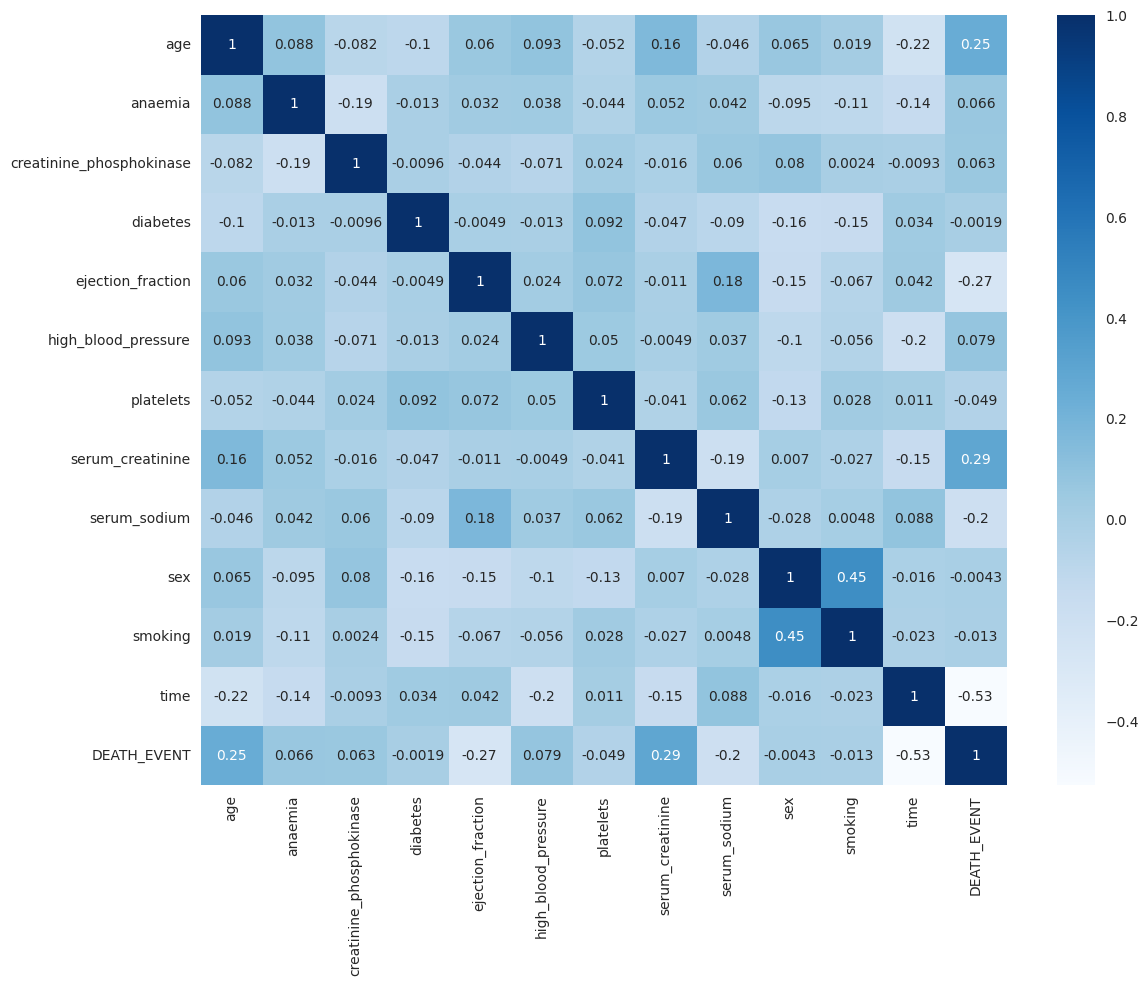

In [136]:
plt.figure(figsize=(13, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

Feature selection

[0.09818855 0.02347517 0.07654408 0.03091922 0.13886922 0.0231678
 0.07131924 0.12077976 0.08541797 0.02611602 0.02604084 0.27916212]


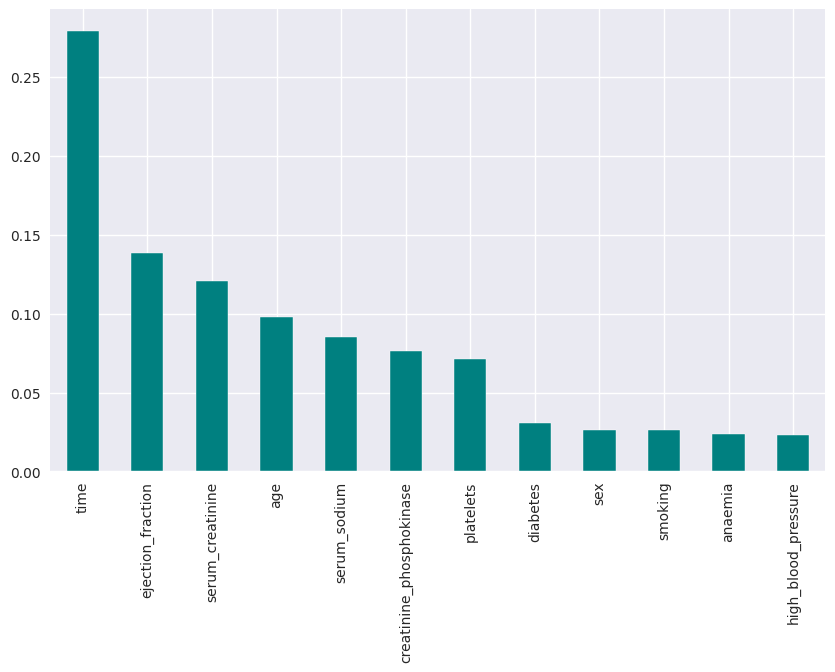

In [137]:
plt.rcParams['figure.figsize']=10,6
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='bar', color='teal')
plt.show()

Checking outliers

In [138]:
binary_columns = []

for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 2:
        binary_columns.append(column)

print("Binary Columns:", binary_columns)


Binary Columns: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


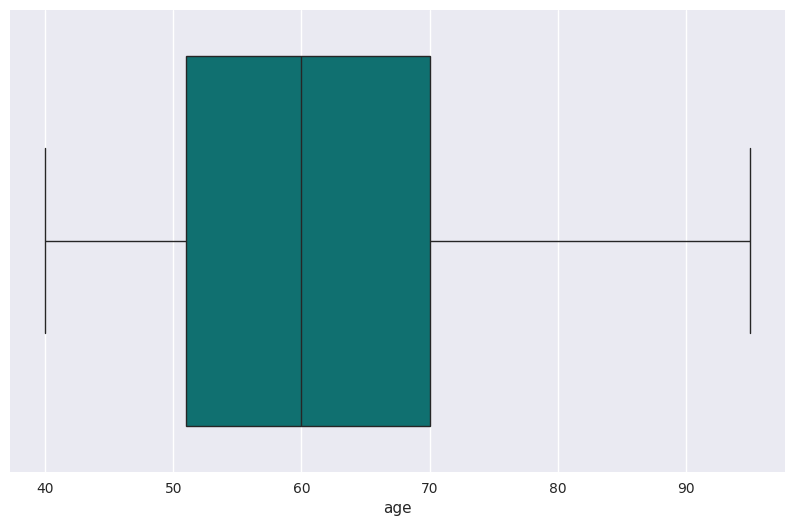

In [139]:
# Boxplot for age

sns.boxplot(x = df.age, color='teal')
plt.show()

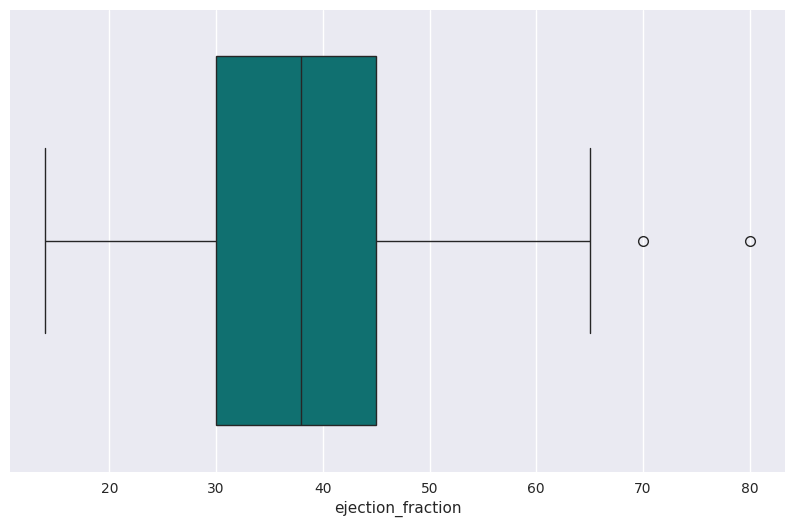

In [140]:
# Boxplot for ejection_fraction

sns.boxplot(x = df.ejection_fraction, color='teal')
plt.show()

Removing outliers(2 outliers found)

In [141]:
df[df['ejection_fraction'] >= 70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [142]:
df = df[df['ejection_fraction'] < 70]

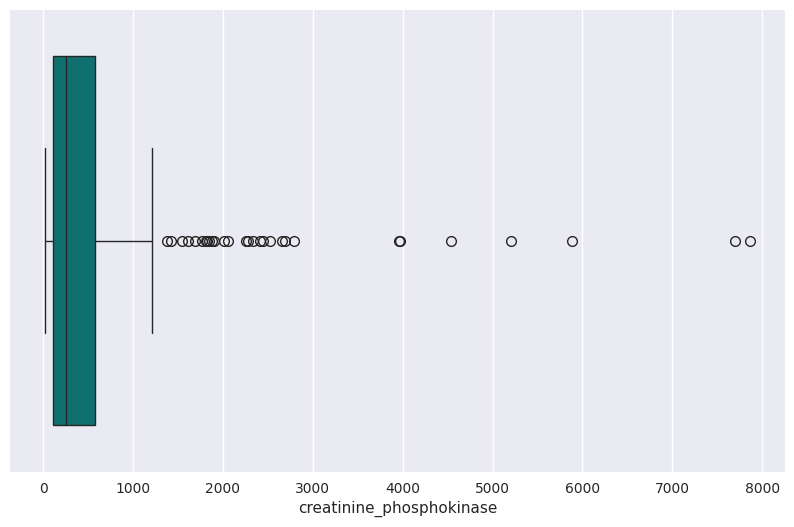

In [143]:
# Boxplot for creatinine_phosphokinase

sns.boxplot(x = df.creatinine_phosphokinase, color='teal')
plt.show()

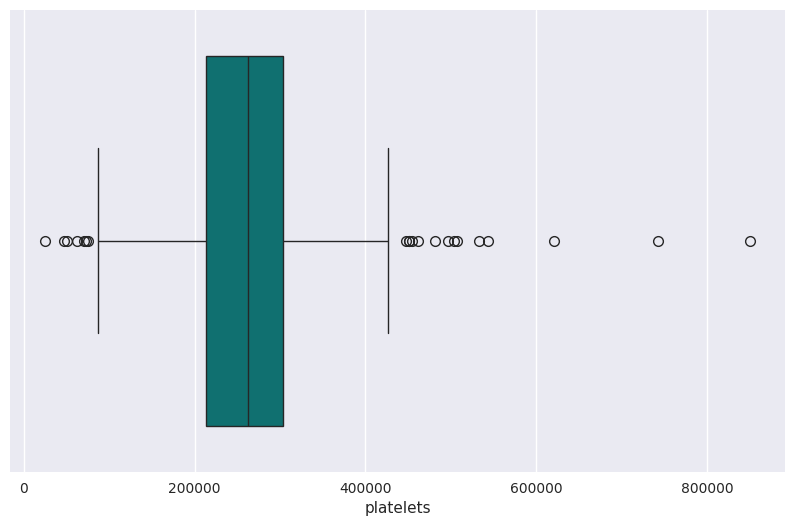

In [144]:
#box plot for platelets
sns.boxplot(x = df.platelets, color='teal')
plt.show()

Boxplot for serum_creatinine


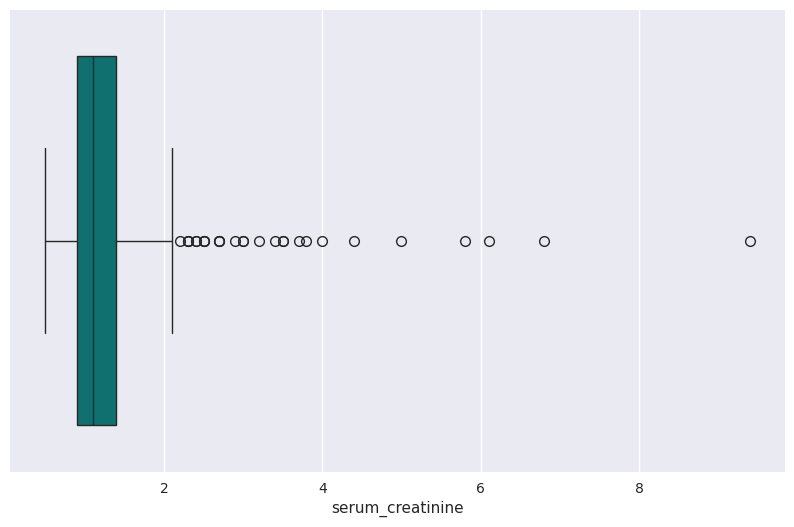

In [145]:
#Box plot for serum_creatinine
sns.boxplot(x = df.serum_creatinine, color='teal')
plt.show()

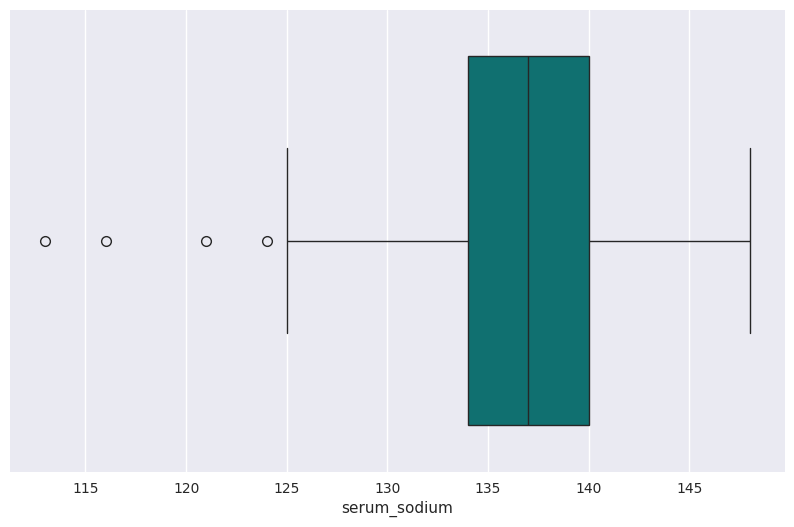

In [146]:
#box plot for serum_sodium
sns.boxplot(x = df.serum_sodium, color='teal')
plt.show()

In [147]:
# Distribution of Age

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
    ))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT',
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [148]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of AGE Vs DEATH_EVENT",
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [149]:
# Similarly lets get insights of other features as well
# Distribution of creatinine_phosphokinase

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['creatinine_phosphokinase'],
    xbins=dict( # bins used for histogram
        start=23,
        end=582,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='CREATININE PHOSPHOKINASE DISTRIBUTION',
    xaxis_title_text='CREATININE PHOSPHOKINASE',
    yaxis_title_text='COUNT',
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [150]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT",
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [151]:
# Distribution of ejection_fraction

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))
fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT',
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [152]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT",
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [153]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==1)]
d2 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==1)]
d3 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [154]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["DEATH_EVENT"]==0) & (df["diabetes"]==0)]
d2 = df[(df["DEATH_EVENT"]==0) & (df["diabetes"]==1)]
d3 = df[(df["DEATH_EVENT"]==1) & (df["diabetes"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["diabetes"]==1)]

label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DIABETES DISTRIBUTION IN THE DATASET \
                  DIABETES VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DIABETES', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [155]:
# "Distribution of AGE Vs DIABETES"
import plotly.express as px
fig = px.histogram(df, x="age", color="diabetes", marginal="violin",hover_data=df.columns,
                   title ="Distribution of AGE Vs DIABETES",
                   labels={"diabetes": "DIABETES", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

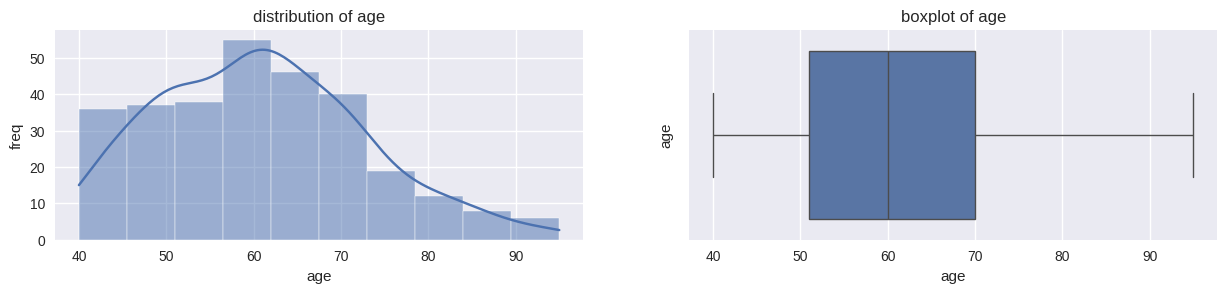

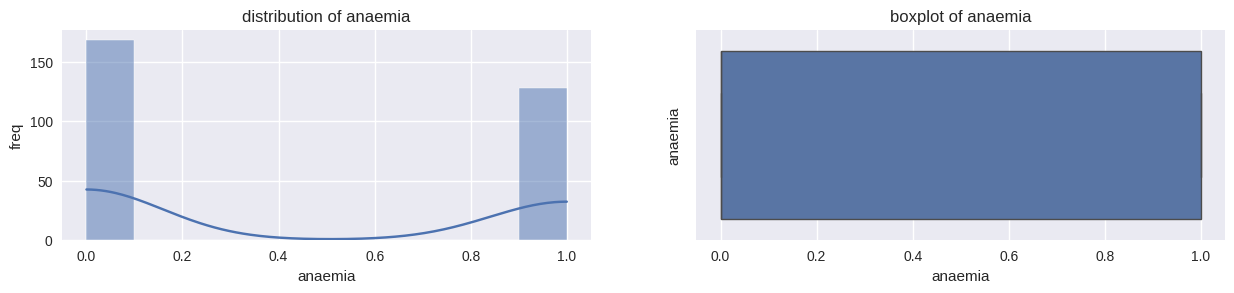

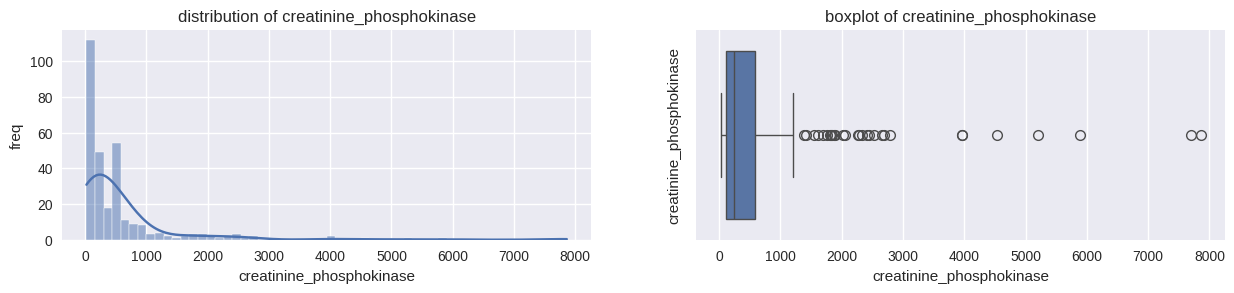

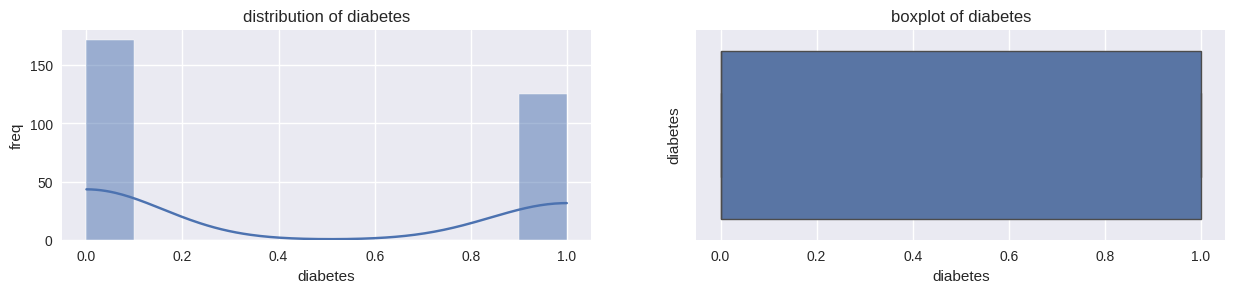

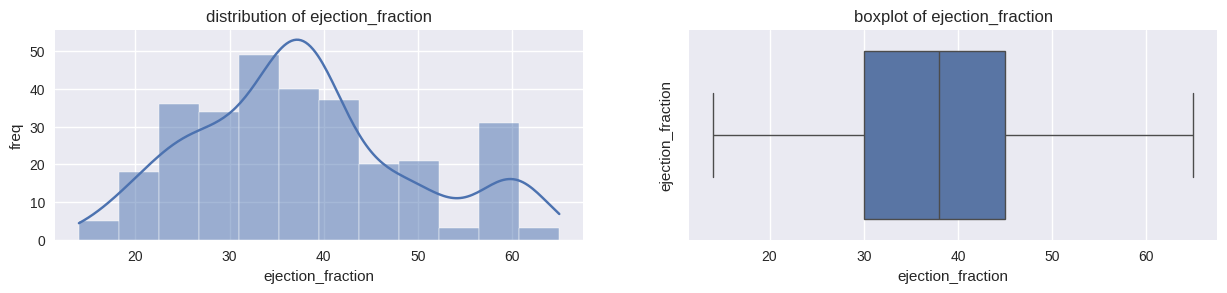

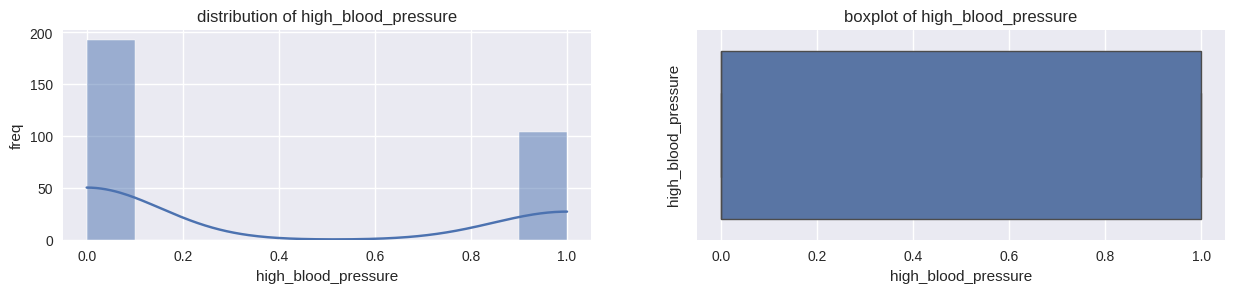

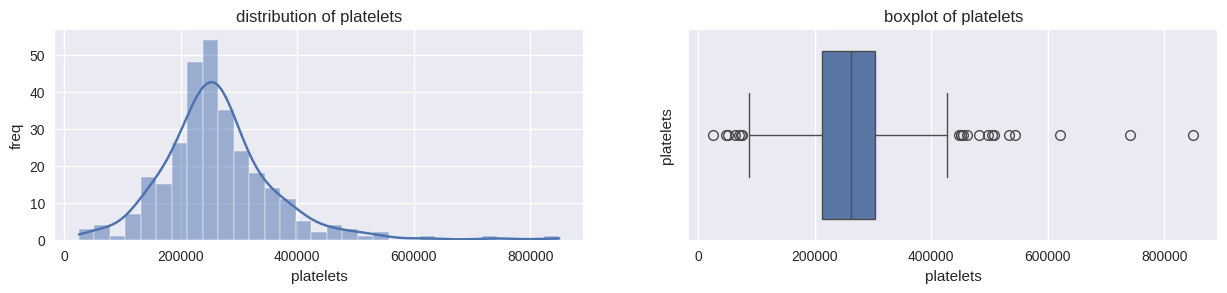

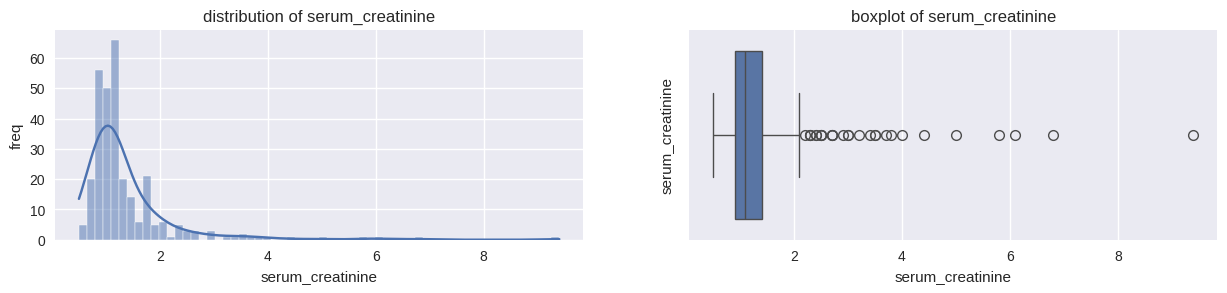

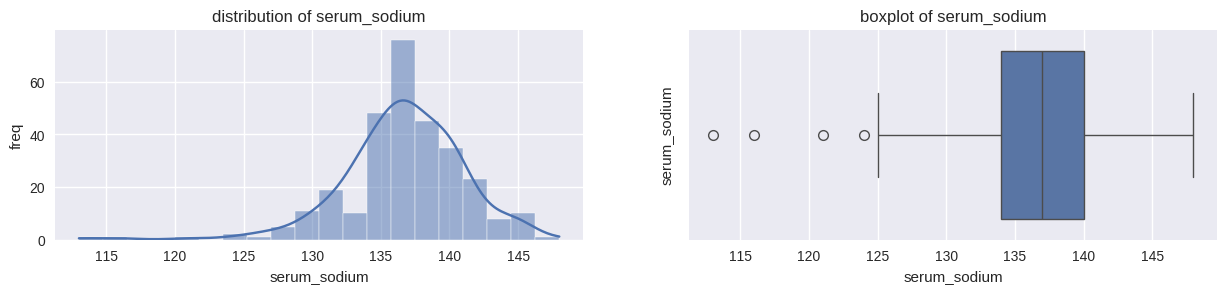

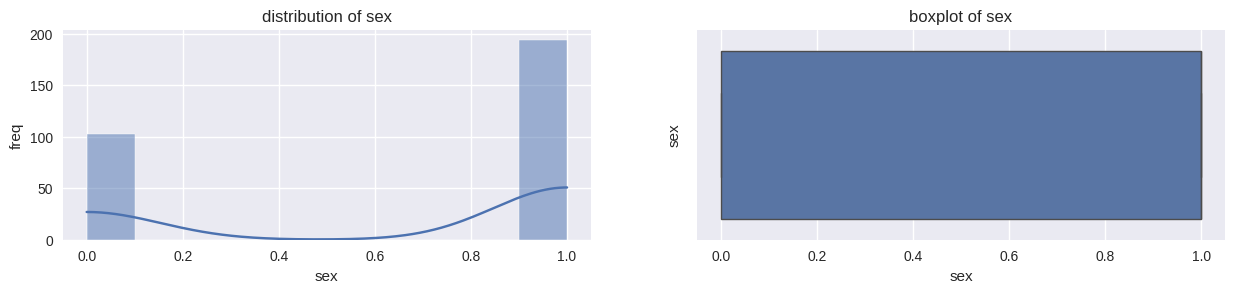

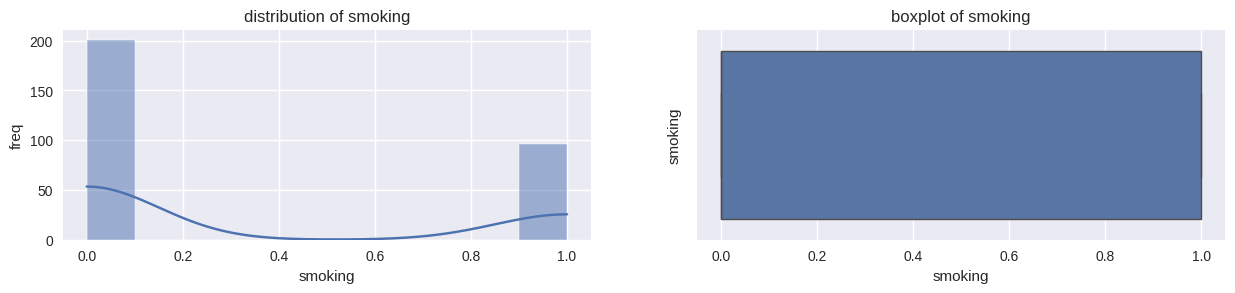

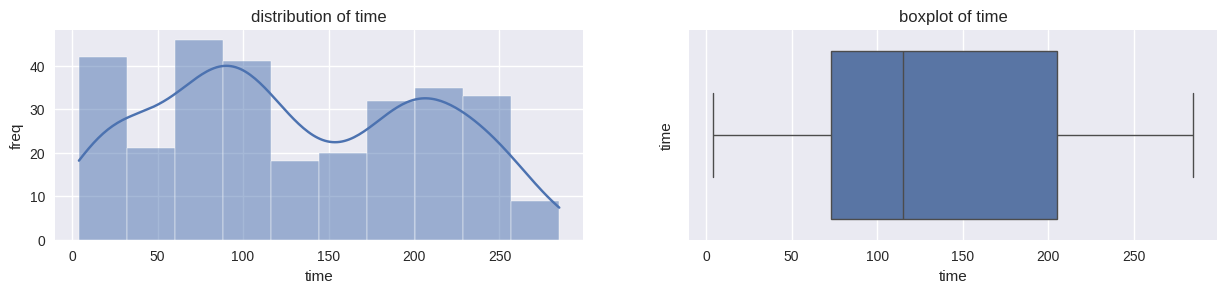

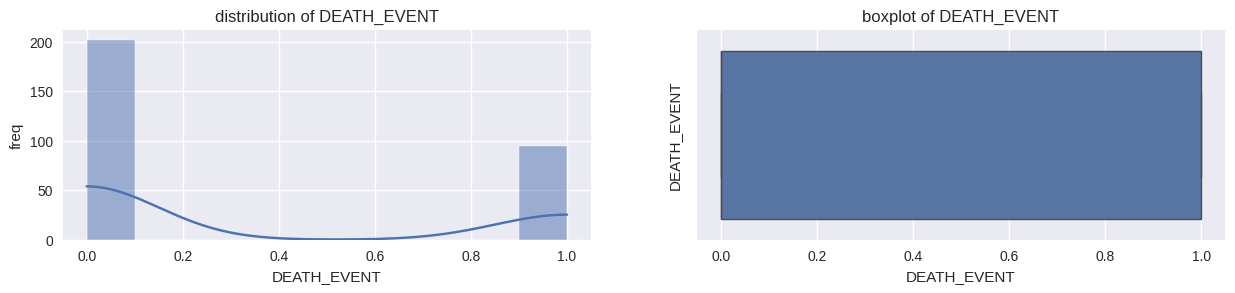

In [156]:
plt.style.use("seaborn")
for column in df.columns:
    if df[column].dtype!="object":
        plt.figure(figsize=(15,6))
        plt.subplot(2,2,1)
        sns.histplot(data=df,x=column,kde=True)
        plt.ylabel("freq")
        plt.xlabel(column)
        plt.title(f"distribution of {column}")
        plt.subplot(2,2,2)
        sns.boxplot(data=df,x=column)
        plt.ylabel(column)
        plt.title(f"boxplot of {column}")
        plt.show()

Splitting Features and Target Variable

In [157]:
x = df.drop("DEATH_EVENT", axis=1)
y = df['DEATH_EVENT']

In [158]:
print(x)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [159]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 297, dtype: int64


Data Re-sampling

In [160]:
pip install imbalanced-learn


In [161]:
from imblearn.over_sampling import SMOTE


In [162]:
smote = SMOTE(random_state=42)


In [163]:
x_r, y_r = smote.fit_resample(x, y)

In [164]:
print(f"The Shape of x_resampled : {x_r.shape}")
print(f"The Shape of y_resampled : {y_r.shape}")

The Shape of x_resampled : (404, 12)
The Shape of y_resampled : (404,)


In [165]:
print(f"Number of missing values in x_resampled: {x_r.isnull().sum().sum()}")
print(f"Number of missing values in y_resampled: {y_r.isnull().sum().sum()}")

Number of missing values in x_resampled: 0
Number of missing values in y_resampled: 0


Data Standardisation


In [166]:
scaler= StandardScaler()

In [167]:
scaler.fit(x)

StandardScaler()

In [168]:
standardized_data = scaler.transform(x)

In [169]:
x = standardized_data
y = df['DEATH_EVENT']

Data Splitting

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x_r, y_r, test_size = 0.2, shuffle = True, random_state = 42, stratify = y_r)

print(f"The Shape of x_train : {x_train.shape}")
print(f"The Shape of x_test : {x_test.shape}")
print(f"The Shape of y_train : {y_train.shape}")
print(f"The Shape of y_test : {y_test.shape}")

The Shape of x_train : (323, 12)
The Shape of x_test : (81, 12)
The Shape of y_train : (323,)
The Shape of y_test : (81,)


Hyperparameter Tuning using GridSearchCV

In [171]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the model
model = XGBClassifier()

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Logistic regression

In [172]:
classifierLR = LogisticRegression()
classifierLR.fit(x_train, y_train)

LogisticRegression()

In [173]:
y_pred = classifierLR.predict(x_test)

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.87      0.82      0.85        40

    accuracy                           0.85        81
   macro avg       0.85      0.85      0.85        81
weighted avg       0.85      0.85      0.85        81



In [175]:
mylist = []

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[36  5]
 [ 7 33]]
0.8518518518518519


In [176]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.87      0.82      0.85        40

    accuracy                           0.85        81
   macro avg       0.85      0.85      0.85        81
weighted avg       0.85      0.85      0.85        81



Decision Tree


In [177]:
classifierDT = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifierDT.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [178]:
y_predd = classifierDT.predict(x_test)
y_predd

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[36  5]
 [ 7 33]]
0.8518518518518519


In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.87      0.82      0.85        40

    accuracy                           0.85        81
   macro avg       0.85      0.85      0.85        81
weighted avg       0.85      0.85      0.85        81



Support vector machine

In [181]:
svm = SVC(C = 0.6, random_state = 42, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=0.6, random_state=42)

In [182]:
y_pred = svm.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[39  2]
 [39  1]]
0.49382716049382713


In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.95      0.66        41
           1       0.33      0.03      0.05        40

    accuracy                           0.49        81
   macro avg       0.42      0.49      0.35        81
weighted avg       0.42      0.49      0.35        81



K-Nearesr neighbors


In [185]:
classifierKN = KNeighborsClassifier(n_neighbors=6)
classifierKN.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [186]:
y_pred = classifierKN.predict(x_test)
print(y_pred)

[0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0
 1 0 0 1 1 1 1]


In [187]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[30 11]
 [20 20]]
0.6172839506172839


In [188]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66        41
           1       0.65      0.50      0.56        40

    accuracy                           0.62        81
   macro avg       0.62      0.62      0.61        81
weighted avg       0.62      0.62      0.61        81



RandomForest

In [189]:
classifierRF = RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)
classifierRF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [190]:
y_pred = classifierRF.predict(x_test)
print(y_pred)

[0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0
 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1]


In [191]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[37  4]
 [ 4 36]]
0.9012345679012346


In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.90      0.90      0.90        40

    accuracy                           0.90        81
   macro avg       0.90      0.90      0.90        81
weighted avg       0.90      0.90      0.90        81



XGBOOST


In [193]:
from xgboost import XGBClassifier
classifierXGB = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifierXGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [194]:
y_pred = classifierXGB.predict(x_test)
print(y_pred)

[0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1
 0 0 1 0 0 1 1]


In [195]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[39  2]
 [ 5 35]]
0.9135802469135802


In [196]:
classifierXGB = XGBClassifier(n_estimators=10, max_depth=12, subsample=0.7)

# Train the classifier on the training data
classifierXGB.fit(x_train, y_train)

# Make predictions on the test data
y_pred = classifierXGB.predict(x_test)

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print the accuracy score
ac = accuracy_score(y_test, y_pred)
print("Accuracy Score:", ac)

Confusion Matrix:
[[39  2]
 [ 5 35]]
Accuracy Score: 0.9135802469135802


In [197]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifierXGB, x, y, cv=5)
# Assuming X and y are your feature matrix and target vector
print("Cross-Validation Scores:", scores)



# Hyperparameter Tuning (Grid Search Example)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [6, 8, 10],
    'subsample': [0.6, 0.7, 0.8]
}
grid_search = GridSearchCV(estimator=classifierXGB, param_grid=param_grid, cv=5)
grid_search.fit(x, y)
print("Best Parameters:", grid_search.best_params_)

# Model Evaluation
from sklearn.metrics import classification_report, roc_auc_score
y_pred = classifierXGB.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

# Error Analysis
errors = x_test[y_test != y_pred]
print("Incorrect Predictions:")
print(errors)


Cross-Validation Scores: [0.33333333 0.81666667 0.83050847 0.61016949 0.6779661 ]
Best Parameters: {'max_depth': 6, 'n_estimators': 10, 'subsample': 0.6}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        41
           1       0.95      0.88      0.91        40

    accuracy                           0.91        81
   macro avg       0.92      0.91      0.91        81
weighted avg       0.92      0.91      0.91        81

AUC-ROC Score: 0.913109756097561
Incorrect Predictions:
           age  anaemia  creatinine_phosphokinase  diabetes  \
112  70.000000        1                       143         0   
325  80.571383        1                       319         0   
109  85.000000        0                       129         0   
20   65.000000        1                        52         0   
189  80.000000        0                       582         1   
244  55.000000        0                      2017         0   

CATBOOST


In [198]:
!pip install catboost

In [199]:
from catboost import CatBoostClassifier
classifierCAT = CatBoostClassifier()
classifierCAT.fit(x_train, y_train)

Learning rate set to 0.006359
0:	learn: 0.6885290	total: 11.2ms	remaining: 11.2s
1:	learn: 0.6830894	total: 16ms	remaining: 7.99s
2:	learn: 0.6782061	total: 19.7ms	remaining: 6.54s
3:	learn: 0.6736838	total: 24.7ms	remaining: 6.16s
4:	learn: 0.6683093	total: 28.9ms	remaining: 5.75s
5:	learn: 0.6631824	total: 32.9ms	remaining: 5.45s
6:	learn: 0.6579827	total: 37.6ms	remaining: 5.33s
7:	learn: 0.6519399	total: 42.7ms	remaining: 5.29s
8:	learn: 0.6472295	total: 45.9ms	remaining: 5.06s
9:	learn: 0.6430199	total: 50.6ms	remaining: 5.01s
10:	learn: 0.6382578	total: 54.3ms	remaining: 4.88s
11:	learn: 0.6341131	total: 58.6ms	remaining: 4.83s
12:	learn: 0.6298147	total: 63.3ms	remaining: 4.8s
13:	learn: 0.6251924	total: 67.1ms	remaining: 4.73s
14:	learn: 0.6215137	total: 70.9ms	remaining: 4.66s
15:	learn: 0.6181402	total: 75.9ms	remaining: 4.67s
16:	learn: 0.6132453	total: 81.1ms	remaining: 4.69s
17:	learn: 0.6085872	total: 84.4ms	remaining: 4.6s
18:	learn: 0.6046860	total: 88.3ms	remaining: 4.

In [200]:
y_pred = classifierCAT.predict(x_test)
print(y_pred)

[0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0
 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1
 0 0 1 0 0 1 1]


In [201]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[38  3]
 [ 6 34]]
0.8888888888888888


Model Evaluation


In [202]:
# Plotting accuracy score of different models
mylist

[0.8518518518518519,
 0.8518518518518519,
 0.49382716049382713,
 0.6172839506172839,
 0.9012345679012346,
 0.9135802469135802,
 0.8888888888888888]

In [203]:
mylist2 = ["Logestic Regression", "DecisionTree", "SupportVector", "KNearestNeighbours", "RandomForest", "XGBOOST","CATBOOST"]

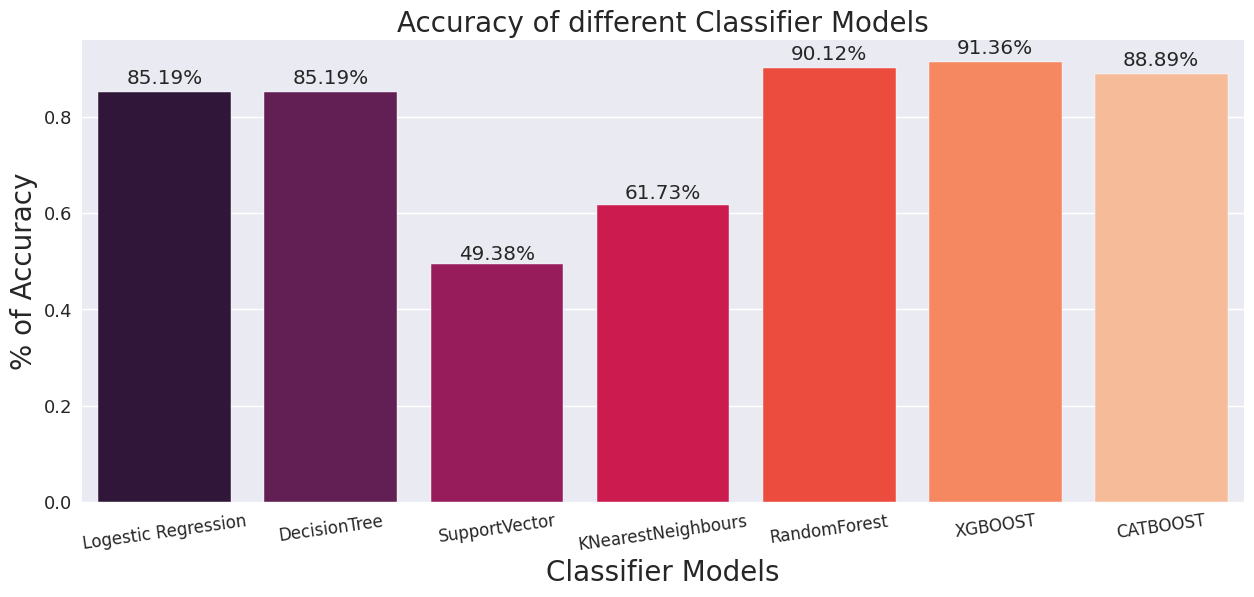

In [204]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Model Saving

In [205]:
import pickle


In [206]:
filename = 'XGBModel.sav'
pickle.dump(classifierXGB, open(filename, 'wb'))

In [207]:
scaler.fit(x_train)

# Save preprocessing objects
with open('scalerxgb.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [208]:
#loading the saved model
loaded_model = pickle.load(open('XGBModel.sav','rb'))
print("Model saved successfully.")

Model saved successfully.


In [209]:
scaler = pickle.load(open('scalerxgb.pkl', 'rb'))

Predictive system

In [210]:
input_data = np.array([[49,1,138,0,30,1,427000,1,138,1,1,20]])
prediction = loaded_model.predict(input_data)

# Display results
if prediction == 1:
    print("The patient is predicted to have a high risk of death.")
else:
    print("The patient is predicted to have a low risk of death.")

The patient is predicted to have a high risk of death.
